<a href="https://colab.research.google.com/github/asheta66/Metahuristics-Search-Algorithms/blob/main/PSO/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Simple Particle Swarm Optimization (PSO) with Python
#   July, 2016
#
#------------------------------------------------------------------------------+
#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2 + x[i]  + 20
    return total

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]           # particle position
        self.velocity_i=[]            # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1           # best error individual
        self.err_i=-1                   # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group
        Best_fitness = []
        Best_Error = []
        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))
        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)
                    #print(pos_best_g )
                    Best_fitness[j:]= pos_best_g   
                    #print(err_best_g)
                    Best_Error[j]=err_best_g        

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1
           
#====================================
        import numpy as np

        # print final results
        print("____________________")
        print("Best Solutions are: ")
        np.set_printoptions(precision=3)
        arr = np.array(pos_best_g)
        print (arr)

        print("____________________")
        print("Minimum error: ")
        print (round(err_best_g))
        print("____________________")

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[5,5]               # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(func1,initial,bounds,num_particles=15,maxiter=30)

#--- END ----------------------------------------------------------------------+

TypeError: ignored

NameError: ignored

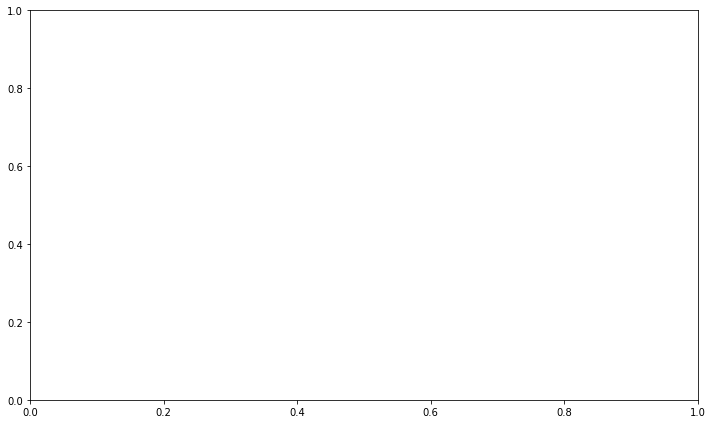

In [59]:
#--- Convergence Curves ----------------------------------------------------------------------+
import matplotlib.pyplot as plt


fig, axs = plt.subplots(figsize=(10, 6), tight_layout=True)
plt.plot(Best_Error, '-b', label='Actual')
#plt.plot(y_pred_test, '.-r', label='Estimated')
plt.xlabel(r'$ Generation (s)$', fontsize=12)
plt.ylabel(r'$ Fitnedd$', fontsize=12)
plt.title(r'Convergence Curve for PSO', fontname= 'serif',fontsize=14, color='b')
plt.grid(True)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='lower center', ncol=2)
#plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\Actual_Estimated.png')
plt.show()
